<font size=6>**5&6**</font>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<font size=6>**head**</font>

In [7]:
retData = pd.read_csv("./002/retdata.csv",index_col="Date")
retData.index = pd.to_datetime(retData.index)
reData = retData*0.01
retData.head()

,A,B,C,D
Date,,,,
2014-01-02,0.0000,0.0000,-1.3333,-0.4449
2014-01-03,-0.8889,-0.8785,-1.0135,-0.5587
2014-01-06,-0.2242,-0.8863,-3.0717,-2.3596
2014-01-07,0.2247,-1.3413,-0.3521,0.1151
2014-01-08,-0.6726,-0.3021,-0.7067,0.5747


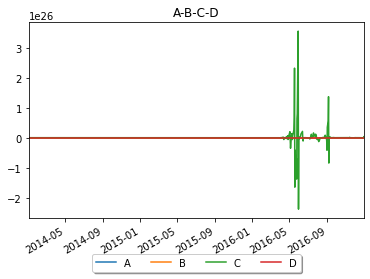

In [13]:
cumreturn = (1+retData).cumprod()-1
cumreturn.plot()
plt.title('A-B-C-D')
plt.legend(loc='lower center',bbox_to_anchor = (0.5,-0.3),ncol = 5,fancybox = True,shadow = True)

In [9]:
retData = retData.dropna()
retData.corr()

,A,B,C,D
A,1.000000,0.072610,0.210182,0.155395
B,0.072610,1.000000,0.199095,0.235830
C,0.210182,0.199095,1.000000,0.205023
D,0.155395,0.235830,0.205023,1.000000


In [10]:
train_set = retData['2014-01-02':'2015-12-31']
test_sey = retData['2016']

In [11]:
# 共變異數矩陣
cov_mat = train_set.cov()
# 收益率均值
avg_rets= train_set.mean()

<font size=6>**function**</font>

In [25]:
def blacklitterman(returns,tau, P, Q):
    mu=returns.mean()
    
    sigma=returns.cov()
    
    pi1=mu
    
    ts = tau * sigma

    Omega = np.dot(np.dot(P,ts),P.T) * np.eye(Q.shape[0])

    middle = np.linalg.inv(np.dot(np.dot(P,ts),P.T) + Omega)  

    er = np.expand_dims(pi1,axis=0).T + np.dot(np.dot(np.dot(ts,P.T),middle),(Q - np.expand_dims(np.dot(P,pi1.T),axis=1)))

    posteriorSigma = sigma + ts - np.dot(ts.dot(P.T).dot(middle).dot(P),ts)

    return [er, posteriorSigma]

In [27]:
pick1 = np.array([1,0,0,0])
q1 = np.array([0.6])
pick2 = np.array([0,-1,0,1])
q2 = np.array([0.2])
pick3 = np.array([1,0,-1,0])
q3 = np.array([0.3])
P = np.array([pick1,pick2,pick3])
Q = np.array([q1,q2,q3])
print(P)
print(Q)
res = blacklitterman(retData,0.1,P,Q)
p_mean = pd.DataFrame(res[0],index =reData.columns,columns=['posterior_mean'])
p_mean

[[ 1  0  0  0]
 [ 0 -1  0  1]
 [ 1  0 -1  0]]
[[0.6]
 [0.2]
 [0.3]]


,posterior_mean
A,0.305914
B,-0.058739
C,0.083899
D,0.031793


In [28]:
p_cov = res[1]
p_cov

,A,B,C,D
A,3.818413,0.267746,0.950288,0.413263
B,0.267746,3.390146,0.807306,0.644438
C,0.950288,0.807306,4.894424,0.620502
D,0.413263,0.644438,0.620502,1.880182
